<a href="https://colab.research.google.com/github/krylowicz/synthetic-data/blob/master/overview_on_the_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installations

In [ ]:
!pip install sdv

     |████████████████████████████████| 93 kB 2.2 MB/s 
     |████████████████████████████████| 97 kB 7.7 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 50 kB 7.8 MB/s 
     |████████████████████████████████| 1.2 MB 46.0 MB/s 
     |████████████████████████████████| 45 kB 4.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 280 kB 71.2 MB/s 
     |████████████████████████████████| 636 kB 62.2 MB/s 
     |████████████████████████████████| 2.5 MB 53.7 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninst

In [ ]:
%pip install sdv==0.12.0

     |████████████████████████████████| 88 kB 3.5 MB/s 
     |████████████████████████████████| 50 kB 7.4 MB/s 
     |████████████████████████████████| 1.1 MB 44.6 MB/s 
     |████████████████████████████████| 5.7 MB 25.2 MB/s 
     |████████████████████████████████| 17.9 MB 55.6 MB/s 
     |████████████████████████████████| 9.5 MB 44.3 MB/s 
     |████████████████████████████████| 95 kB 5.8 MB/s 
     |████████████████████████████████| 22.3 MB 62.2 MB/s 
     |████████████████████████████████| 776.8 MB 17 kB/s 
     |████████████████████████████████| 9.8 MB 48.6 MB/s 
     |████████████████████████████████| 23.2 MB 1.2 MB/s 
     |████████████████████████████████| 23.3 MB 1.3 MB/s 
     |████████████████████████████████| 23.3 MB 1.8 MB/s 
     |████████████████████████████████| 22.1 MB 1.6 MB/s 
     |████████████████████████████████| 22.1 MB 920 kB/s 
     |████████████████████████████████| 17.4 MB 52.0 MB/s 
     |████████████████████████████████| 17.3 MB 163 kB/s 
     |███████████

In [ ]:
!pip install sdmetrics

In [ ]:
!pip install ctgan

The latest Version of table_evaluatore doesnt work properly. Should be downgraded to the specific version

In [ ]:
!pip install table_evaluator==1.2.2.post1

  Created wheel for table-evaluator: filename=table_evaluator-1.2.2.post1-py3-none-any.whl size=17051 sha256=2ac0c1103f7f48db9cb165991bc48ab2c6092fcd46143010fa5d407bd77a0533
  Stored in directory: /root/.cache/pip/wheels/45/c7/20/47a3f8b044d705f3c088d9577968a805dded4b83096fabd2ac
Successfully built table-evaluator
  Attempting uninstall: table-evaluator
    Found existing installation: table-evaluator 1.3.2
    Uninstalling table-evaluator-1.3.2:
      Successfully uninstalled table-evaluator-1.3.2


In [ ]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 8.0 MB/s 


In [ ]:
!pip install table-evaluator

In [ ]:
import tensorflow as tf

import pandas as pd
import numpy as np

from ctgan import CTGANSynthesizer
from ctgan import load_demo

from table_evaluator import load_data, TableEvaluator

import matplotlib.pyplot as plt

# SDV PACKAGE
from sdv import SDV
from sdv.tabular import TVAE

from sdv import load_demo
from sdv.evaluation import evaluate

from sdv import Metadata

from table_evaluator import load_data, TableEvaluator

import sdmetrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

## Import dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Capstone/_data/dataset_09022022.csv')

FileNotFoundError: ignored

In [ ]:
df = df.sample(n = 2000, random_state=17)

NameError: ignored

In [ ]:
df.info()

In [ ]:
df.head(5)

## Data Cleaning


In [ ]:
df = df.dropna()
df = df.drop('Unnamed: 0', 1)
df.date = pd.to_datetime(df.date)

In [ ]:
df['postcode']=df['postcode'].astype(str)

In [ ]:
df.loan_status.value_counts()

In [ ]:
# df['dates']=df['dates'].astype(str)

Dividing dataset to categorical & numerical columns; used for table evaluation

In [ ]:
df_cat = df[['customer_id', 
                    'city',
                    'street',
                    'date', 'loan_status']]

In [ ]:
df_num = df[['current_loan_amount',   
 'annual_income',
 'monthly_debt',  
 'current_credit_balance',
 'bankruptcies',
 'postcode']]

In [ ]:
df.to_csv('/content/drive/MyDrive/Capstone/_data/df_sample.csv')

## CTGAN

A GAN-based Deep Learning data synthesizer that can generate synthetic tabular data with high fidelity

### Model

In [ ]:
discrete_columns = ['customer_id',
                    'bankruptcies', 
                    'city',
                    'street',
                    'date', 'loan_status','current_loan_amount',   
 'annual_income',
 'monthly_debt',  
 'current_credit_balance',
 'bankruptcies',
 'postcode']

In [ ]:
ctgan = CTGANSynthesizer(epochs=500, verbose=True)
ctgan.fit(df, discrete_columns)

In [ ]:
# Synthetic copy
sample = ctgan.sample(2000)
sample

In [ ]:
sample.info()

In [ ]:
sample.to_csv('/content/drive/MyDrive/Capstone/_STD/CTGAN_500epochs_2000entries.csv')

### Evaluation q = 0.65

In [ ]:
import seaborn as sns

sns.lineplot(data=df, x="date", y="annual_income")

In [ ]:
sns.lineplot(data=sample, x="date", y="annual_income")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone/_data/df_sample.csv')

In [ ]:
sample = pd.read_csv('/content/drive/MyDrive/Capstone/_STD/CTGAN_500epochs_2000entries.csv')

In [ ]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(df, sample, cat_cols=df_cat.columns.values.tolist())

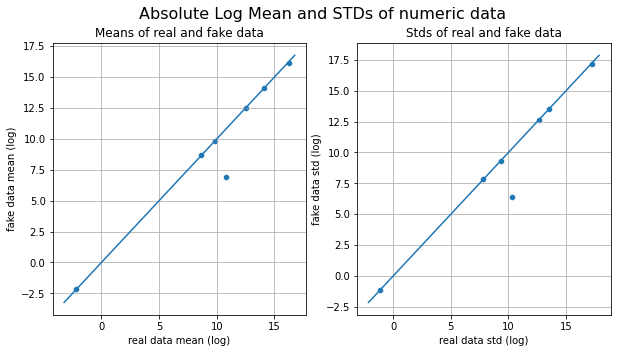

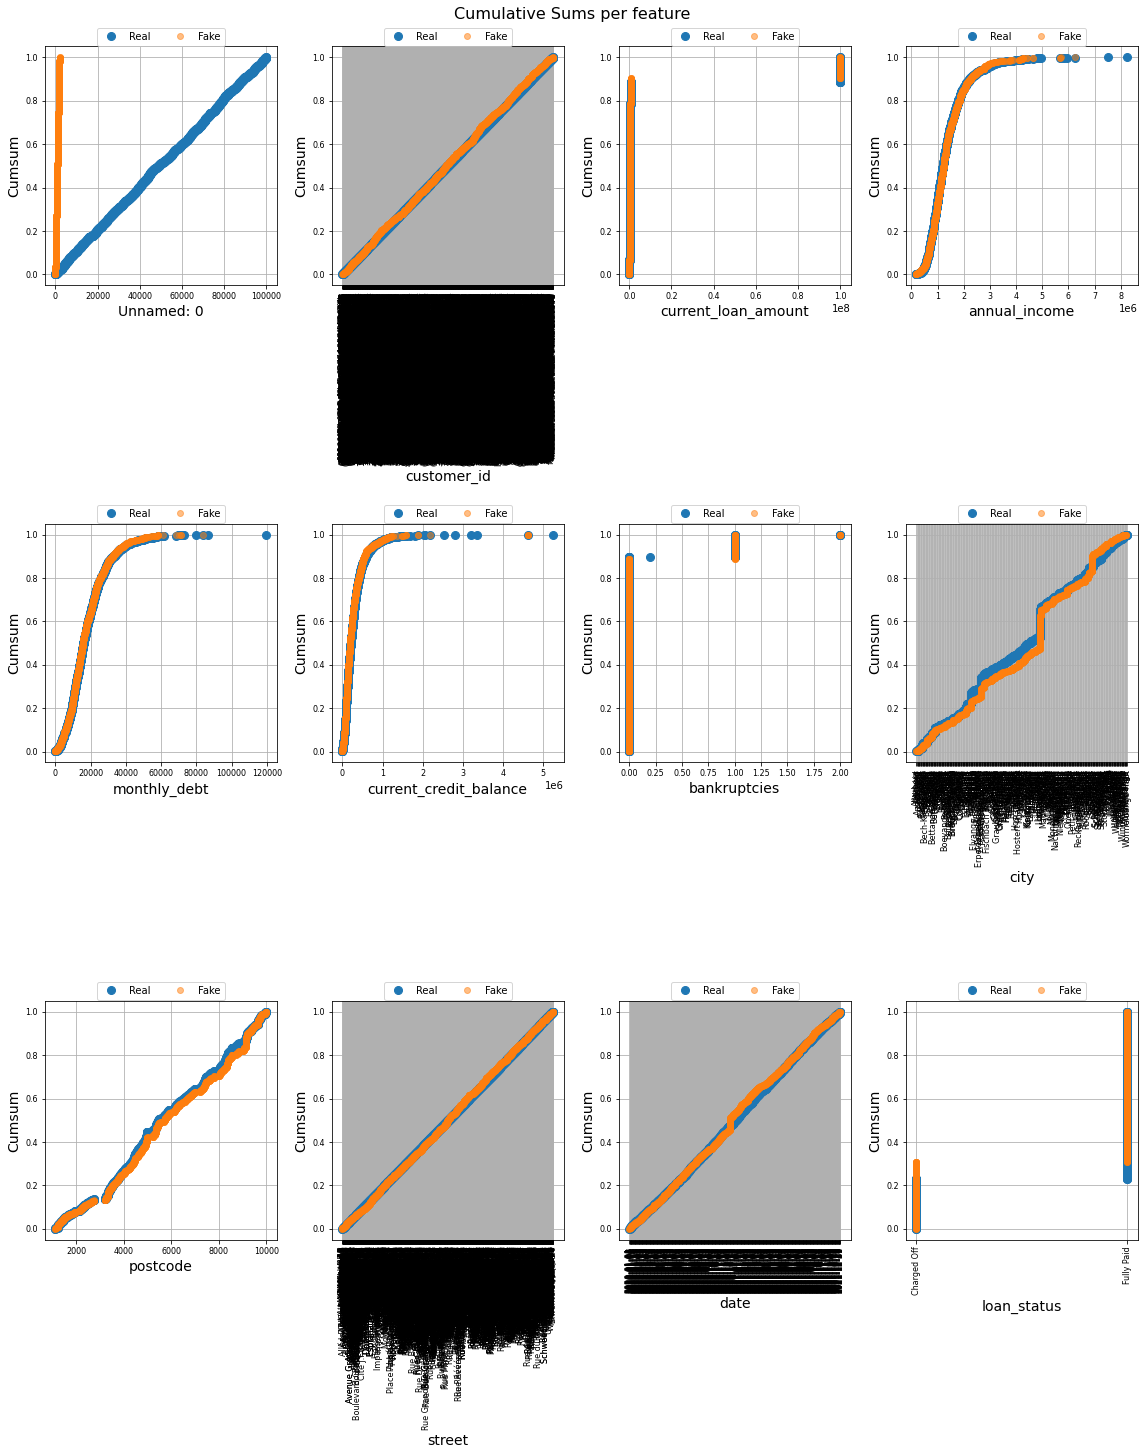

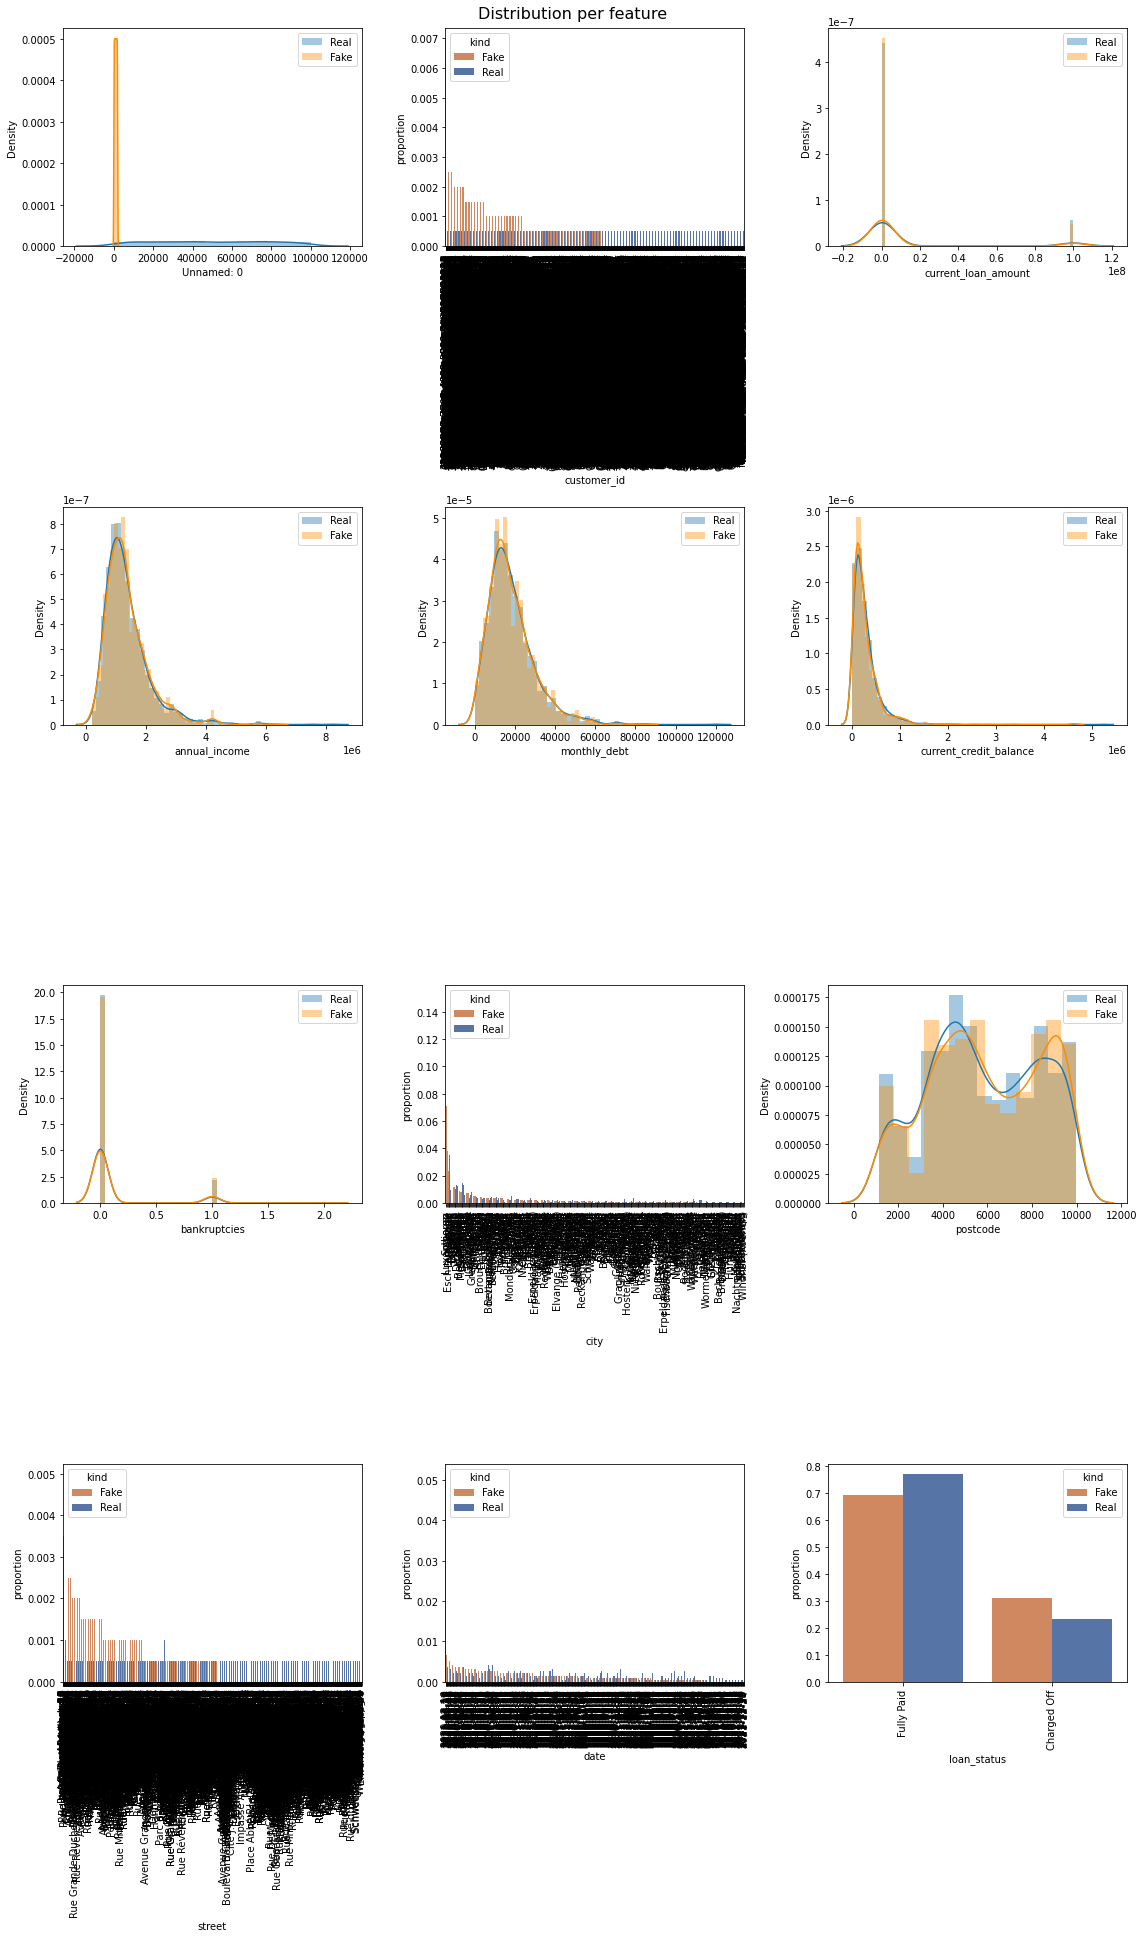

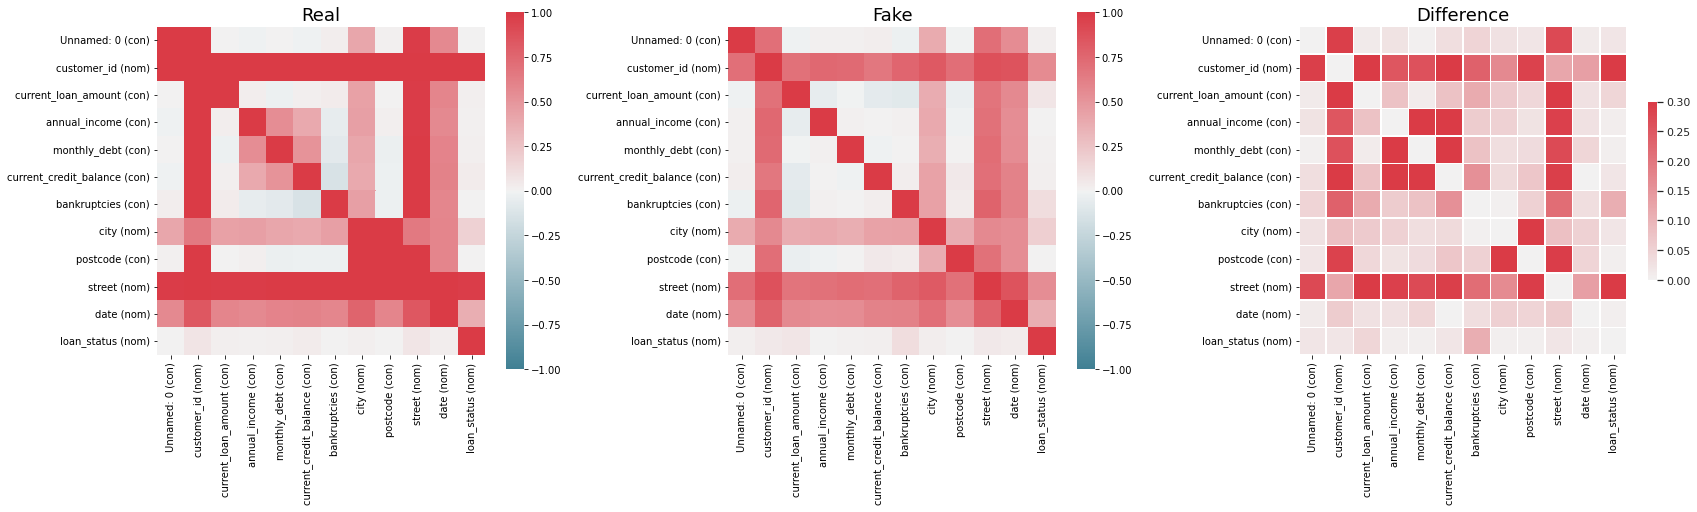

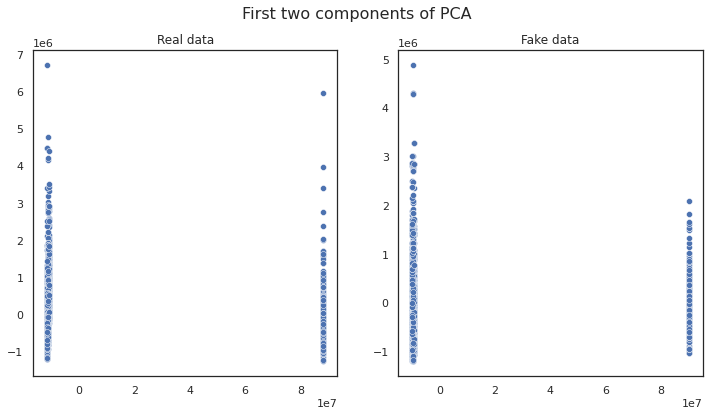

In [ ]:
table_evaluator.visual_evaluation()

The output of this function EVALUATE() call will be a number between 0 and 1 that will indicate how similar the two tables are, being 0 the worst and 1 the best possible score.

In [ ]:
evaluate(sample, df)

0.47798152235059743

In [ ]:
evaluate(sample, df, aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal
0,BNLogLikelihood,BayesianNetwork Log Likelihood,-18.420681,1.000000e-08,-inf,0.0,MAXIMIZE
1,LogisticDetection,LogisticRegression Detection,0.028195,2.819516e-02,0.0,1.0,MAXIMIZE
2,SVCDetection,SVC Detection,0.207707,2.077073e-01,0.0,1.0,MAXIMIZE
11,GMLogLikelihood,GaussianMixture Log Likelihood,-68.583249,1.639356e-30,-inf,inf,MAXIMIZE
12,CSTest,Chi-Squared,0.970614,9.706135e-01,0.0,1.0,MAXIMIZE
13,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.836643,8.366429e-01,0.0,1.0,MAXIMIZE
14,KSTestExtended,Inverted Kolmogorov-Smirnov D statistic,0.883875,8.838750e-01,0.0,1.0,MAXIMIZE
27,ContinuousKLDivergence,Continuous Kullback–Leibler Divergence,0.756836,7.568357e-01,0.0,1.0,MAXIMIZE
28,DiscreteKLDivergence,Discrete Kullback–Leibler Divergence,0.138317,1.383175e-01,0.0,1.0,MAXIMIZE


In [ ]:
df.hist(figsize=(12,12), sharey=True);

In [ ]:
sample.hist(figsize=(12,12), sharey=True);

#### Utility metrics (TRTR *etc*)

In [ ]:
import pandas as pd
sample = pd.read_csv('/content/drive/MyDrive/Capstone/_STD/CTGAN_500epochs_2000entries.csv')

In [ ]:
df['date_year'] = df['date'].dt.year
df['date_month'] = df['date'].dt.month
df['date_day'] = df['date'].dt.day

In [ ]:
df['date_month']=df['date_month'].astype(str)
df['date_day'] = df['date'].astype(str)

In [ ]:
df = df.drop('postcode', 1)
df = df.drop('city', 1)
df = df.drop('date_year', 1)
df = df.drop('customer_id', 1)
df = df.drop('date', 1)
df = df.drop('date_day', 1)
df = df.drop('street', 1)

In [ ]:
sample.date = pd.to_datetime(sample.date)
sample['date_year'] = sample['date'].dt.year
sample['date_month'] = sample['date'].dt.month
sample['date_day'] = sample['date'].dt.day

In [ ]:
sample['date_month']=sample['date_month'].astype(str)
sample['postcode']=sample['postcode'].astype(str)
sample['date_day'] = sample['date'].astype(str)

In [ ]:
sample.loan_status.value_counts()

In [ ]:
sample = sample.drop('Unnamed: 0', 1)
sample = sample.drop('date_year', 1)
sample = sample.drop('customer_id', 1)
sample = sample.drop('postcode', 1)

In [ ]:
sample = sample.drop('city', 1)
sample = sample.drop('street', 1)
sample = sample.drop('date_month', 1)
sample = sample.drop('date_day', 1)
sample = sample.drop('date', 1)

In [ ]:
df

In [ ]:
sample

In [ ]:
X_train_RD, X_test_RD, y_train_RD, y_test_RD = train_test_split(df.drop(columns=['loan_status']), # X
                                                    df['loan_status'], # y
                                                    test_size=0.3, # %age of test split
                                                    random_state=17, stratify = df['loan_status'])

In [ ]:
X_train_STD, X_test_STD, y_train_STD, y_test_STD = train_test_split(sample.drop(columns=['loan_status']), # X
                                                    sample['loan_status'], # y
                                                    test_size=0.3, # %age of test split
                                                    random_state=17, stratify = sample['loan_status'])

In [ ]:
categorical_features_RD = X_train_RD.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features_RD = X_train_RD.select_dtypes(include=['int', 'float']).columns.tolist()

categorical_features_RD, numeric_features_RD

In [ ]:
categorical_features_STD = X_train_STD.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features_STD = X_train_STD.select_dtypes(include=['int', 'float']).columns.tolist()

categorical_features_STD, numeric_features_STD

In [ ]:
categorical_transformer = Pipeline(steps=[
                                          ("cat_imputer", SimpleImputer(strategy='constant',
                                                                        fill_value='Not Available')),
                                          ("onehot", OneHotEncoder(handle_unknown="ignore"))
                                          ])
categorical_transformer

In [ ]:
numeric_transformer = Pipeline(steps=[
                                      ("knn_imputer", KNNImputer(n_neighbors=5)),
                                      ("scaler", StandardScaler())
                                      ])

numeric_transformer

In [ ]:
numeric_transformer = Pipeline(steps=[
                                      ("knn_imputer", KNNImputer(n_neighbors=5))
                                      ])

numeric_transformer

In [ ]:
preprocessor_RD = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer, 
                                                       numeric_features_RD),
                                               ("cat", categorical_transformer, 
                                                       categorical_features_RD)
                                               ])
preprocessor_RD

In [ ]:
preprocessor_STD = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer, 
                                                       numeric_features_STD),
                                               ("cat", categorical_transformer, 
                                                       categorical_features_STD)
                                               ])
preprocessor_STD

##### TRTR

In [ ]:
scores_train = []
scores_test = []
f1_scores = []

models = {RandomForestClassifier(random_state=17, class_weight='balanced')}

for i in models:
    model = i
    pipeline = Pipeline(steps=[
                              ("pre_process", preprocessor_RD), 
                              ("model", model)
                              ])
    pipeline.fit(X_train_RD, y_train_RD)
    y_pred = pipeline.predict(X_test_RD)
    scores_train.append([i, np.mean(cross_val_score(pipeline, X_train_RD, y_train_RD))]) #scoring='f1_weighted'
    #scores_test.append(cross_val_score(pipeline_lr, X_test, y_test))
    f1_scores.append([i,f1_score(y_test_RD, y_pred,average="weighted")])
scores_train, f1_scores

In [ ]:
target_names = ['Charged Off', 'Fully Paid']
print(classification_report(y_test_RD, y_pred, target_names=target_names))

In [ ]:
conf_mat = confusion_matrix(y_test_RD, y_pred)
conf_mat

In [ ]:
from sklearn.linear_model import LogisticRegression
# {'Charged Off': 3.5,
#                                            'Fully Paid': 1}

model = LogisticRegression(random_state=17, solver='liblinear', class_weight= 'balanced')
pipeline = Pipeline(steps=[
                              ("pre_process", preprocessor_RD), 
                              ("model", model)
                              ])
pipeline.fit(X_train_RD, y_train_RD)
y_pred = pipeline.predict(X_test_RD)
scores_train = np.mean(cross_val_score(pipeline, X_train_RD, y_train_RD)) #scoring='f1_weighted'
f1_scores = f1_score(y_test_RD, y_pred,average="weighted")
scores_train, f1_scores 

In [ ]:
conf_mat = confusion_matrix(y_test_RD, y_pred)
conf_mat

In [ ]:
target_names = ['Charged Off', 'Fully Paid']
print(classification_report(y_test_RD, y_pred, target_names=target_names))

In [ ]:
from sklearn.linear_model import LogisticRegression
# {'Charged Off': 3.5,
#                                            'Fully Paid': 1}

model = LogisticRegression(random_state=17, C = 1.0,
 class_weight =None, dual = False, fit_intercept = True, intercept_scaling = 1, l1_ratio = None,
 max_iter = 1000,n_jobs = None, penalty = 'l2', solver = 'lbfgs',
 tol = 0.0001, verbose = 1, warm_start = False)
pipeline = Pipeline(steps=[
                              ("pre_process", preprocessor_RD), 
                              ("model", model)
                              ])
pipeline.fit(X_train_RD, y_train_RD)
y_pred = pipeline.predict(X_test_RD)
scores_train = np.mean(cross_val_score(pipeline, X_train_RD, y_train_RD)) #scoring='f1_weighted'
f1_scores = f1_score(y_test_RD, y_pred,average="weighted")
scores_train, f1_scores 

In [ ]:
conf_mat = confusion_matrix(y_test_RD, y_pred)
conf_mat

In [ ]:
target_names = ['Charged Off', 'Fully Paid']
print(classification_report(y_test_RD, y_pred, target_names=target_names))

GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Optimization
parameters = {'model__C' : [1, 10, 100, 1000],
              #'penalty': ['none', 'l1', 'l2', 'elasticnet'],
              'model__solver': ['liblinear', 'lbfgs']
             }

# Run the grid search
lr = LogisticRegression(random_state=17)
pipeline = Pipeline(steps=[
                              ("pre_process", preprocessor_RD), 
                              ("model", lr)
                              ])
grid_obj = GridSearchCV(pipeline, parameters, cv=5)
grid_obj = grid_obj.fit(X_train_RD, y_train_RD)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets 
clf.fit(X_train_RD, y_train_RD)

In [ ]:
grid_obj.best_params_

In [ ]:
 # Prediction on test data
y_pred = clf.predict(X_test_RD)

# Calculating the accuracy
acc_logreg = round( metrics.accuracy_score(y_test_RD, y_pred) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logreg )

In [ ]:
target_names = ['Charged Off', 'Fully Paid']
print(classification_report(y_test_RD, y_pred, target_names=target_names))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Optimization
parameters = {'criterion': ['entropy', 'gini'],
                 'max_depth': [10, 20, None],
                 'max_features': ['sqrt', 'log2'],
                 'n_estimators': [50, 100, 200]}

# Run the grid search
rf = RandomForestClassifier(random_state=17, class_weight='balanced')
pipeline = Pipeline(steps=[
                              ("pre_process", preprocessor_RD), 
                              ("model", rf)
                              ])
grid_obj = GridSearchCV(pipeline, parameters, scoring='f1', cv=3, verbose=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_RD, y_train_RD)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets 
clf.fit(X_train_RD, y_train_RD)

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import cross_val_score

# random_search = {'criterion': ['entropy', 'gini'],
#                  'max_depth': [10, 20, None],
#                  'max_features': ['sqrt', 'log2'],
#                  'n_estimators': [50, 100, 200]}

#                # 2 x 3 x 2 x 3 = 36 => randomly selects 10 combinations (models) from 36 possible model hyperparameter configs

# rf = RandomForestClassifier(random_state=17, class_weight='balanced')
# clf = Pipeline(steps=[
#                               ("pre_process", preprocessor_RD), 
#                               ("model", rf)
#                               ])

# random_search_obj = RandomizedSearchCV(estimator=clf,
#                            param_distributions=random_search,
#                            n_iter=10,
#                            scoring='f1',
#                            cv=3, verbose=1, random_state=42, n_jobs=-1)

# random_search_obj.fit(X_train_RD, y_train_RD)

In [ ]:
from pycaret.classification import *

reg_new = setup(data=pd.concat([X_train_RD, y_train_RD], axis=1), 
            target = 'loan_status', 
            session_id=13, 
            log_experiment=True, 
            experiment_name='Challenge')

In [ ]:
best_model = compare_models(fold=5)

low AUCs indicates that models perform like random guesses, with little prediction value.

In [ ]:
plot_model(best_model, plot="auc")

In [ ]:
tuned = tune_model(best_model)

In [ ]:
plot_model(best_model, plot = 'feature_all', use_train_data = False, plot_kwargs = {'percent': True})

In [ ]:
best_model.get_params()

##### TSTS

In [ ]:
models = {LogisticRegression(random_state=17, C = 1.0,
 class_weight =None, dual = False, fit_intercept = True, intercept_scaling = 1, l1_ratio = None,
 max_iter = 1000,n_jobs = None, penalty = 'l2', solver = 'lbfgs',
 tol = 0.0001, verbose = 1, warm_start = False)}
scores_train = []
scores_test = []
f1_scores = []

for i in models:
    model = i
    pipeline = Pipeline(steps=[
                              ("pre_process", preprocessor_STD), 
                              ("model", model)
                              ])
    pipeline.fit(X_train_STD, y_train_STD)
    y_pred = pipeline.predict(X_test_STD)
    scores_train.append([i, np.mean(cross_val_score(pipeline, X_train_STD, y_train_STD))]) #scoring='f1_weighted'
    #scores_test.append(cross_val_score(pipeline_lr, X_test, y_test))
    f1_scores.append([i,f1_score(y_test_STD, y_pred,average="binary", pos_label='Fully Paid')])
scores_train, f1_scores

In [ ]:
conf_mat = confusion_matrix(y_test_STD, y_pred)
conf_mat

In [ ]:
target_names = ['Charged Off', 'Fully Paid']
print(classification_report(y_test_STD, y_pred, target_names=target_names))

##### TRTS

In [ ]:
models = {LogisticRegression(random_state=17, C = 1.0,
 class_weight =None, dual = False, fit_intercept = True, intercept_scaling = 1, l1_ratio = None,
 max_iter = 1000,n_jobs = None, penalty = 'l2', solver = 'lbfgs',
 tol = 0.0001, verbose = 1, warm_start = False)}
 
scores_train = []
scores_test = []
f1_scores = []

for i in models:
    model = i
    pipeline = Pipeline(steps=[
                              ("pre_process", preprocessor_RD), 
                              ("model", model)
                              ])
    pipeline.fit(X_train_RD, y_train_RD)
    y_pred = pipeline.predict(X_test_STD)
    scores_train.append([i, np.mean(cross_val_score(pipeline, X_train_RD, y_train_RD))]) #scoring='f1_weighted'
    #scores_test.append(cross_val_score(pipeline_lr, X_test, y_test))
    f1_scores.append([i,f1_score(y_test_STD, y_pred,average="binary", pos_label='Fully Paid')])
scores_train, f1_scores

In [ ]:
conf_mat = confusion_matrix(y_test_STD, y_pred)
conf_mat

In [ ]:
target_names = ['Fully Paid', 'Charged Off']
print(classification_report(y_test_STD, y_pred, target_names=target_names))

##### TSTR

In [ ]:
models = {LogisticRegression(random_state=17, C = 1.0,
 class_weight =None, dual = False, fit_intercept = True, intercept_scaling = 1, l1_ratio = None,
 max_iter = 1000,n_jobs = None, penalty = 'l2', solver = 'lbfgs',
 tol = 0.0001, verbose = 1, warm_start = False)}

for i in models:
    model = i
    pipeline = Pipeline(steps=[
                              ("pre_process", preprocessor_STD), 
                              ("model", model)
                              ])
    pipeline.fit(X_train_STD, y_train_STD)
    y_pred = pipeline.predict(X_test_RD)
    scores_train.append([i, np.mean(cross_val_score(pipeline, X_train_STD, y_train_STD))]) #scoring='f1_weighted'
    #scores_test.append(cross_val_score(pipeline_lr, X_test, y_test))
    f1_scores.append([i,f1_score(y_test_RD, y_pred,average="binary", pos_label='Fully Paid')])
scores_train, f1_scores

In [ ]:
conf_mat = confusion_matrix(y_test_RD, y_pred)
conf_mat

In [ ]:
target_names = ['Charged Off', 'Fully Paid']
print(classification_report(y_test_RD, y_pred, target_names=target_names))

#### Data Labelling Analysis (DLA) 66%

In [ ]:
df['Label'] = df.apply(lambda x: 0, axis=1)

In [ ]:
sample['Label'] = sample.apply(lambda x: 1, axis=1)

In [ ]:
df_DLA = pd.concat([df, sample])

In [ ]:
df_DLA = df_DLA.sample(frac = 1)

In [ ]:
df_DLA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_DLA.drop(columns=['Label']), # X
                                                    df_DLA['Label'], # y
                                                    test_size=0.2, # %age of test split
                                                    random_state=17)

In [ ]:
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = X_train.select_dtypes(include=['int', 'float']).columns.tolist()

categorical_features, numeric_features

Define Preprocessing Pipeline

In [ ]:
categorical_transformer = Pipeline(steps=[
                                          ("cat_imputer", SimpleImputer(strategy='constant',
                                                                        fill_value='Not Available')),
                                          ("onehot", OneHotEncoder(handle_unknown="ignore"))
                                          ])
categorical_transformer

In [ ]:
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())
                                      ])

numeric_transformer

In [ ]:
preprocessor = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer, 
                                                       numeric_features),
                                               ("cat", categorical_transformer, 
                                                       categorical_features)
                                               ])
preprocessor

##### Model



In [ ]:
models = {RandomForestClassifier(random_state=17)}
scores_train = []
scores_test = []
f1_scores = []

for i in models:
    model = i
    pipeline = Pipeline(steps=[
                              ("pre_process", preprocessor), 
                              ("model", model)
                              ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    scores_train.append([i, np.mean(cross_val_score(pipeline, X_train, y_train))]) #scoring='f1_weighted'
    #scores_test.append(cross_val_score(pipeline_lr, X_test, y_test))
    f1_scores.append([i,f1_score(y_test, y_pred,average="binary", pos_label=1)])
scores_train, f1_scores

In [ ]:
conf_mat = confusion_matrix(
        y_test, y_pred)
conf_mat 

In [ ]:
target_names = ['Fully Paid', 'Charged Off']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
model = CatBoostClassifier(iterations=1000, task_type="GPU")
pipeline = Pipeline(steps=[
                              ("pre_process", preprocessor), 
                              ("model", model)
                              ])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [ ]:
conf_mat = confusion_matrix(
        y_test, y_pred)
conf_mat 

In [ ]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)
pipeline = Pipeline(steps=[
                              ("pre_process", preprocessor), 
                              ("model", model)
                              ])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat 

In [ ]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
!pip install pycaret[full]

In [ ]:
!pip install pyyaml==5.4.1 --ignore-installed

In [ ]:
from pycaret.classification import *

reg_new = setup(data=pd.concat([X_train, y_train], axis=1), 
            target = 'Label', 
            session_id=13, 
            log_experiment=True, 
            experiment_name='Challenge')

In [ ]:
best_model = compare_models(fold=5)

##TVAE: Triplet-Based Variational Autoencoder 
https://sdv.dev/SDV/user_guides/single_table/tvae.html

### Model

In [ ]:
model = TVAE(epochs=1000)

model.fit(df)

In [ ]:
new_data = model.sample(1000)
new_data.head()

In [ ]:
new_data.info()

In [ ]:
df.info()

### Evaluation q = 0.50

In [ ]:
table_evaluator = TableEvaluator(df, new_data, cat_cols=df_cat.columns.values.tolist())

In [ ]:
table_evaluator.visual_evaluation()

In [ ]:
evaluate(new_data, df, aggregate=False)

In [ ]:
evaluate(new_data, df)

### Data Labelling Analysis (DLA)

In [ ]:
df['Label'] = df.apply(lambda x: 0, axis=1)

In [ ]:
new_data['Label'] = new_data.apply(lambda x: 1, axis=1)

In [ ]:
df_DLA = pd.concat([df, new_data])

In [ ]:
df_DLA = df_DLA.sample(frac = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_DLA.drop(columns=['Label']), # X
                                                    df_DLA['Label'], # y
                                                    test_size=0.2, # %age of test split
                                                    random_state=17)

In [ ]:
model = KNeighborsClassifier(n_neighbors=10)
pipeline = Pipeline(steps=[
                              ("pre_process", preprocessor), 
                              ("model", model)
                              ])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [ ]:
from pycaret.classification import *

reg_new = setup(data=pd.concat([X_train, y_train], axis=1), 
            target = 'Label', 
            session_id=13, 
            log_experiment=True, 
            experiment_name='Challenge')

In [ ]:

best_model = compare_models(fold=5)

## GaussianCopula Model
https://sdv.dev/SDV/user_guides/single_table/gaussian_copula.html

A tool to model multivariate distributions using copula functions

Attention: update to the latest SDV version

### Model

In [ ]:
from sdv.tabular import GaussianCopula

model = GaussianCopula()

In [ ]:
model.fit(df)

In [ ]:
new_data = model.sample(2000)

In [ ]:
new_data

In [ ]:
new_data.to_csv('/content/drive/MyDrive/Capstone/_STD/GaussianCopula_std_2000entries.csv')

### Evaluation q = 0.48

In [ ]:
table_evaluator = TableEvaluator(df, new_data, cat_cols=df_cat.columns.values.tolist())

In [ ]:
table_evaluator.visual_evaluation()

In [ ]:
ax = df['postcode'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="____")
ax.set_xlabel("_____")
ax.set_ylabel("_____")

In [ ]:
ax = new_data['postcode'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="____")
ax.set_xlabel("_____")
ax.set_ylabel("_____")

In [ ]:
df['Postal Code'].unique()

In [ ]:
new_data['Postal Code'].unique()

In [ ]:
metrics = sdmetrics.multi_table.MultiTableMetric.get_subclasses()
sdmetrics.compute_metrics(metrics, df, new_data, metadata=None)

In [ ]:
from sdv.evaluation import evaluate

evaluate(new_data, df)

## CopulaGAN
https://sdv.dev/SDV/user_guides/single_table/copulagan.html

In [ ]:
df.info()

### Model

In [ ]:
from sdv.tabular import CopulaGAN
# transformers_dict = {'current_loan_amount': 'float', 'annual_income': 'float', 'monthly_debt': 'float','current_credit_balance': 'float', 'bankruptcies': 'float', 'date': 'datetime', 'loan_status': 'one_hot_encoding', 'city': 'one_hot_encoding'} 
model = CopulaGAN(epochs = 500)

In [ ]:
new_data = model.sample(200)

In [ ]:
new_data

In [ ]:
new_data.to_csv('/content/drive/MyDrive/Capstone/_STD/CopulaGAN_std_2000entries.csv')

### Evaluation q = 0.53

In [ ]:
table_evaluator = TableEvaluator(df, new_data, cat_cols=df_cat.columns.values.tolist())

In [ ]:
table_evaluator.visual_evaluation()

In [ ]:
evaluate(new_data, df)

In [ ]:
df.street.nunique()

In [ ]:
rd = pd.read_csv('/content/drive/MyDrive/Capstone/_data/dataset_09022022.csv')

In [ ]:
rd.street.nunique()